<h3>Hamiltonian Cycle Problem</h3>
<p> A Hamiltonian cycle is a closed loop on a graph where every node (vertex) is visited exactly once.
    A loop is just an edge that joins a node to itself; so a Hamiltonian cycle is a path traveling from a point back to itself, visiting every node en route. <br>
    So the problem is: Given a graph G, is there a Hamilton cycle ?
</p>

In [60]:
import numpy as np
import random as rnd
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict
from numpy import random

In [61]:
def printAllHamiltonianPaths(G, n, visited, path, vertex):
    
    if len(path) == n:
        return True
    
    # Check if every edge starting from vertex `v` leads to a solution or not    
    for w in GetAdjacents(G,vertex):
        if not visited[w]:
            visited[w] = True
            path.append(w)
 
            # check if adding vertex `w` to the path leads to the solution or not
            if printAllHamiltonianPaths(G, n, visited, path, w):
                return True
 
            # backtrack
            visited[w] = False
            path.pop()
            
    return False

def HamiltonianCycle(G, n, v, currPos = 0, count = 1):
    
    print(str(count) + " - " + str(n))
    
    if (count == n and (currPos,0) in G.edges(currPos)):
        return True
 
    for i in range(n):
        if (v[i] == False and (currPos,i) in G.edges(currPos)):
            
            v[i] = True
            found = HamiltonianCycle(G, n, v, i, count + 1)
            
            if found:
                return True
            
            v[i] = False
            
    return False

def DeterministicHamiltonianCycle(G):

    n = len(G.nodes())
    for node in G.nodes:
        start_vertex = node
        visited = [False for i in range(n)]
        visited[start_vertex] = True 
        path = [start_vertex]
        if printAllHamiltonianPaths(G, n, visited, path, start_vertex):
            return True
 
    return False

#     return(HamiltonianCycle(G, n, v))

def NonDeterministicHamiltonian(G):
    
    picked = []
    
    for i in G.nodes:
        edge = rnd.choice(list(G.edges(i)))
        picked.append(edge)
        
    return(CheckHamiltonPath(picked,G.nodes()))

def CheckHamiltonPath(ans, nodes):
    
    if len(ans) < 1:
        return False
    
    path = [ans[0]]
    
    for i in range (1, len(ans)):
        for j in range(i, len(ans)):
            if ans[i] not in path:
                if ans[i][0] == path[-1][0] or ans[i][0] == path[-1][1]:
                    path.append(ans[i])
                elif ans[i][1] == path[-1][0] or ans[i][1] == path[-1][1]:
                    path.append(ans[i])
    
    print(path)
    if(len(path) != len(ans)):
        return False
    
    times_visited = {}
    for z in nodes:
        times_visited[z] = 0

    for i in range (0, len(path)):
        times_visited[path[i][0]]+=1
        times_visited[path[i][1]]+=1
        if times_visited[path[i][0]] > 2 or times_visited[path[i][1]] > 2:
            return False
                
    return True

def CheckHamiltonCycle(ans, nodes):
    
    if len(ans) < 1:
        return False
    
    path = [ans[0]]
    
    for i in range (1, len(ans)):
        for j in range(i, len(ans)):
            if ans[i] not in path:
                if ans[i][0] == path[-1][0] or ans[i][0] == path[-1][1]:
                    path.append(ans[i])
                elif ans[i][1] == path[-1][0] or ans[i][1] == path[-1][1]:
                    path.append(ans[i])
    
    return path
    if(len(path) != len(ans)):
        return False
    
    times_visited = {}
    for z in nodes:
        times_visited[z] = 0

    for i in range (0, len(path)):
        times_visited[path[i][0]]+=1
        times_visited[path[i][1]]+=1
        if times_visited[path[i][0]] > 2 or times_visited[path[i][1]] > 2:
            return False
                
    return True

def GetAdjacents(G,vertex):
    adjacents = []
    for i in G.edges():
        if i[0] == vertex:
            adjacents.append(i[1])
        elif i[1] == vertex:
            adjacents.append(i[0])
    return adjacents

def PrintGraph(G,re,rn,be,bn):
    
    node_pos=nx.get_node_attributes(G,'pos')
    arc_weight=nx.get_edge_attributes(G,'weight')

    nx.draw_networkx_nodes(G, node_pos, nodelist=rn, cmap=plt.get_cmap('jet'),node_color = "#FF9A00", node_size = 500)
    nx.draw_networkx_nodes(G, node_pos, nodelist=bn, cmap=plt.get_cmap('jet'),node_color = "#FF9A00", node_size = 500)
    nx.draw_networkx_labels(G, node_pos)
    nx.draw_networkx_edges(G, node_pos, edgelist=re, edge_color='#FF9A00', arrows=False)
    nx.draw_networkx_edges(G, node_pos, edgelist=be, arrows=False)
    nx.draw_networkx_edge_labels(G, node_pos, edge_labels=arc_weight)
    plt.axis('off')
    plt.show()

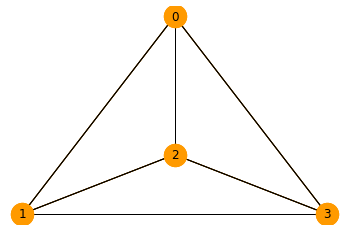

In [62]:
G=nx.DiGraph()

G.add_node(0,pos=(0,0))
G.add_node(1,pos=(-1,-1))
G.add_node(2,pos=(0,-0.7))
G.add_node(3,pos=(1,-1))

list_arcs = [(0, 1),(0, 2),(0, 3),(1, 0),(1, 2),(1, 3),(2, 0),(2, 1),(2, 3),(3, 0),(3, 1),(3, 2)]
G.add_edges_from(list_arcs)

PrintGraph(G,G.edges(),G.nodes(),G.edges(),G.nodes())

In [63]:
print("Deterministc algorithm: " + str(DeterministicHamiltonianCycle(G)))
print("Nondeterministc algorithm: " + str(NonDeterministicHamiltonian(G)))

Deterministc algorithm: True
[(0, 3), (2, 3), (3, 1)]
Nondeterministc algorithm: False


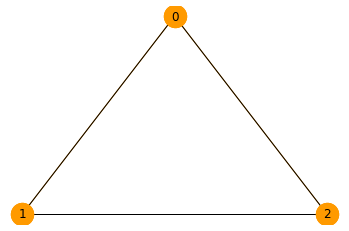

In [51]:
G2=nx.DiGraph()

G2.add_node(0,pos=(0,0))
G2.add_node(1,pos=(-1,-1))
G2.add_node(2,pos=(1,-1))

list_arcs = [(0, 1),(0, 2),(1, 2)]
G2.add_edges_from(list_arcs)

PrintGraph(G2,G2.edges(),G2.nodes(),G2.edges(),G2.nodes())

In [52]:
print("Deterministc algorithm: " + str(DeterministicHamiltonianCycle(G2)))
#print("Nondeterministc algorithm: " + str(NonDeterministicHamiltonian(G2)))

Deterministc algorithm: True


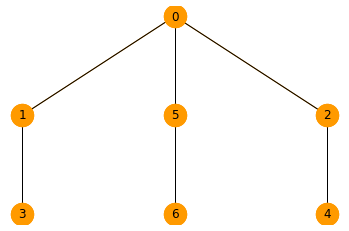

In [55]:
G3=nx.DiGraph()

G3.add_node(0,pos=(0,0))
G3.add_node(1,pos=(-1,-1))
G3.add_node(2,pos=(1,-1))
G3.add_node(3,pos=(-1,-2))
G3.add_node(4,pos=(1,-2))
G3.add_node(5,pos=(0,-1))
G3.add_node(6,pos=(0,-2))

list_arcs = [(0, 1),(0, 2),(0,5),(1,3),(2,4),(5,6)]
G3.add_edges_from(list_arcs)

PrintGraph(G3,G3.edges(),G3.nodes(),G3.edges(),G3.nodes())

In [56]:
print("Deterministc algorithm: " + str(DeterministicHamiltonianCycle(G3)))
#print("Nondeterministc algorithm: " + str(NonDeterministicHamiltonian(G3)))

Deterministc algorithm: False
